# Test data

In [15]:
import os
import librosa
import pandas as pd
import numpy as np
import random
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings

### Transcript

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
features_path = "/content/drive/MyDrive/speech_wav/features.csv"
df = pd.read_csv(features_path)
df.head()

,clipname,transcript,group,word,tone,indicator,type,sentence,word_count,mfcc_1,...,spect_4,spect_5,spect_6,spect_7,tonnetz_1,tonnetz_2,tonnetz_3,tonnetz_4,tonnetz_5,tonnetz_6
0,IWTGH_1,I want to go home.,1,Neutral,Neutral,NaN,Statement,Single,18,-456.161011,...,12.345949,13.214580,16.673017,31.776100,0.028255,-0.018589,0.115786,-0.013089,-0.031850,-0.050886
1,IWTGH_2,I want to go home.,1,Neutral,Anger,NaN,Statement,Single,18,-403.748169,...,12.661829,13.684149,17.276580,33.785295,0.000486,0.028319,0.064798,-0.031453,0.001535,-0.017270
2,IWTGH_3,I want to go home.,1,Neutral,Disgust,NaN,Statement,Single,18,-455.887939,...,12.708105,13.574046,15.457117,33.037995,0.022056,-0.044555,0.114726,-0.004732,-0.040863,-0.023962
3,IWTGH_4,I want to go home.,1,Neutral,Fear,NaN,Statement,Single,18,-460.136444,...,12.829127,13.194763,17.238967,32.216306,0.008253,-0.017944,0.081751,-0.002341,-0.019149,-0.016467
4,IWTGH_5,I want to go home.,1,Neutral,Sad,NaN,Statement,Single,18,-432.942596,...,12.880225,13.129890,17.900985,31.293743,0.010412,-0.034611,0.111465,-0.056060,-0.061425,-0.031940


### Audio

In [18]:
import librosa
import torchaudio

# Set audio directory
audio_dir = "/content/drive/MyDrive/speech_wav/audio"

# Load all audio files recursively
def load_audio_files(audio_dir):
    file_paths = {}
    total_files = 0

    for root, dirs, files in os.walk(audio_dir):
        for fname in files:
            if fname.endswith('.wav'):
                clip_name = fname.replace('.wav', '')
                full_path = os.path.join(root, fname)
                try:
                    waveform, sample_rate = torchaudio.load(full_path)
                    file_paths[clip_name] = waveform
                    total_files += 1
                except Exception as e:
                    print(f"Error loading {full_path}: {e}")

    print(f"Loaded {total_files} audio files across subfolders.")
    return file_paths

In [19]:
# Load audio
audio_data = load_audio_files(audio_dir)

# Map audio to dataframe
df['audio_path'] = df['clipname'].apply(lambda x: os.path.join(audio_dir, x + '.wav'))
df['audio'] = df['clipname'].map(audio_data)
#df = df[df['audio'].apply(lambda x: isinstance(x, torch.Tensor) or (isinstance(x, list) and torch.is_tensor(x[0])))]

# Display data
df.head()

Loaded 180 audio files across subfolders.


,clipname,transcript,group,word,tone,indicator,type,sentence,word_count,mfcc_1,...,spect_6,spect_7,tonnetz_1,tonnetz_2,tonnetz_3,tonnetz_4,tonnetz_5,tonnetz_6,audio_path,audio
0,IWTGH_1,I want to go home.,1,Neutral,Neutral,NaN,Statement,Single,18,-456.161011,...,16.673017,31.776100,0.028255,-0.018589,0.115786,-0.013089,-0.031850,-0.050886,/content/drive/MyDrive/speech_wav/audio/IWTGH_...,"[[tensor(0.), tensor(0.), tensor(0.), tensor(0..."
1,IWTGH_2,I want to go home.,1,Neutral,Anger,NaN,Statement,Single,18,-403.748169,...,17.276580,33.785295,0.000486,0.028319,0.064798,-0.031453,0.001535,-0.017270,/content/drive/MyDrive/speech_wav/audio/IWTGH_...,"[[tensor(0.), tensor(0.), tensor(0.), tensor(0..."
2,IWTGH_3,I want to go home.,1,Neutral,Disgust,NaN,Statement,Single,18,-455.887939,...,15.457117,33.037995,0.022056,-0.044555,0.114726,-0.004732,-0.040863,-0.023962,/content/drive/MyDrive/speech_wav/audio/IWTGH_...,"[[tensor(0.), tensor(0.), tensor(0.), tensor(0..."
3,IWTGH_4,I want to go home.,1,Neutral,Fear,NaN,Statement,Single,18,-460.136444,...,17.238967,32.216306,0.008253,-0.017944,0.081751,-0.002341,-0.019149,-0.016467,/content/drive/MyDrive/speech_wav/audio/IWTGH_...,"[[tensor(0.), tensor(0.), tensor(0.), tensor(0..."
4,IWTGH_5,I want to go home.,1,Neutral,Sad,NaN,Statement,Single,18,-432.942596,...,17.900985,31.293743,0.010412,-0.034611,0.111465,-0.056060,-0.061425,-0.031940,/content/drive/MyDrive/speech_wav/audio/IWTGH_...,"[[tensor(0.), tensor(0.), tensor(0.), tensor(0..."


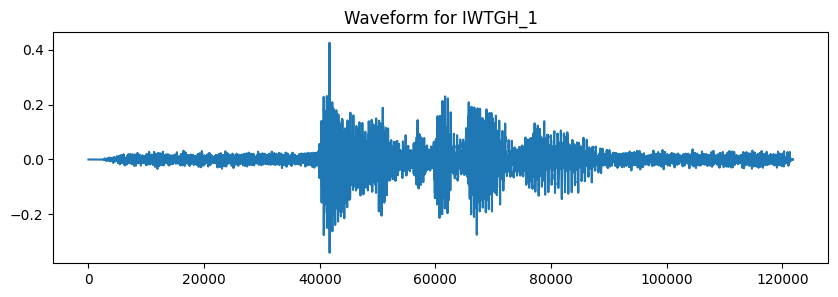

In [20]:
import matplotlib.pyplot as plt

waveform = df.iloc[0]['audio'][0]
plt.figure(figsize=(10, 3))
plt.plot(waveform.numpy())
plt.title(f"Waveform for {df.iloc[0]['clipname']}")
plt.show()

# Audio only

In [21]:
# HuggingFace Transformers modules
from transformers import (
    Wav2Vec2Model, Wav2Vec2FeatureExtractor,
    AutoTokenizer, AutoModelForSequenceClassification,
    AutoModelForSpeechSeq2Seq, AutoProcessor, pipeline
)

# Set seeds for reproducibility
def set_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    if torch.cuda.is_available():
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

set_seed(42)

In [22]:
class wav2Vec_transferModel(nn.Module):
    def __init__(self, pretrained_model_name="r-f/wav2vec-english-speech-emotion-recognition"):
        super().__init__()
        self.model = Wav2Vec2Model.from_pretrained(pretrained_model_name)
        for param in self.model.parameters():
            param.requires_grad = False
        self.dropout = nn.Dropout(0.2)

        # Match exactly what was saved
        self.classifier_emo = nn.Sequential(
            nn.Linear(self.model.config.hidden_size, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            self.dropout,
            nn.Linear(32, 6)
        )

    def forward(self, inputs):
        input_values = inputs['input_values']
        attention_mask = inputs['attention_mask']
        with torch.no_grad():
            outputs = self.model(input_values=input_values, attention_mask=attention_mask)
            pooled = outputs.last_hidden_state.mean(1)
        logits = self.classifier_emo(pooled)
        return logits

# Combined audio and text

In [23]:
class emotionDetectionSystem():
    def __init__(self, useAudio=True, useText=True):
        self.useAudio = useAudio
        self.useText = useText
        self.device = "cuda" if torch.cuda.is_available() else "cpu"

        # Load Wav2Vec2 model for audio emotion recognition
        if self.useAudio:
            self.wav2vec_modelName = "r-f/wav2vec-english-speech-emotion-recognition"
            self.wav2vec_model = wav2Vec_transferModel()
            self.wav2vec_model.load_state_dict(torch.load("balanceWav2Vec.pth", map_location=self.device), strict=False)
            self.wav2vec_model.eval()
            self.wav2vec_model.to(self.device)
            self.audio_feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained(self.wav2vec_modelName)

        # Load BERT-based text emotion classifier and Whisper transcription model
        if self.useText:
            self.textClassifier_model_name = "michellejieli/emotion_text_classifier"
            self.tokenizer = AutoTokenizer.from_pretrained(self.textClassifier_model_name)
            self.textModel = AutoModelForSequenceClassification.from_pretrained(self.textClassifier_model_name)
            self.textModel.to(self.device)
            self.textModel.eval()

            self.transcriptModel_id = "openai/whisper-large-v3-turbo"
            self.torch_dtype = torch.float16 if torch.cuda.is_available() else torch.float32

            self.transcriptModel = AutoModelForSpeechSeq2Seq.from_pretrained(
                self.transcriptModel_id,
                torch_dtype=self.torch_dtype,
                low_cpu_mem_usage=True,
                use_safetensors=True
            ).to(self.device)

            self.transcriptProcessor = AutoProcessor.from_pretrained(self.transcriptModel_id)

            self.transcriptPipe = pipeline(
                "automatic-speech-recognition",
                model=self.transcriptModel,
                tokenizer=self.transcriptProcessor.tokenizer,
                feature_extractor=self.transcriptProcessor.feature_extractor,
                torch_dtype=self.torch_dtype,
                device=0 if self.device == "cuda" else -1,
            )

    def predict(self, audio_path=None):
        # Load and preprocess audio to 16kHz
        audio, sr = librosa.load(audio_path, sr=16000)

        # Convert to torch tensor and fix shape
        audio_tensor = torch.tensor(audio)
        if audio_tensor.ndim == 1:
            audio_tensor = audio_tensor.unsqueeze(0)  # [time] → [1, time]
        elif audio_tensor.ndim > 2:
            audio_tensor = audio_tensor.squeeze()

        # Audio-based prediction
        if self.useAudio:
            audioInput = self.audio_feature_extractor(
                audio_tensor.squeeze().numpy(), sampling_rate=16000, return_tensors="pt"
            ).to(self.device)

            with torch.no_grad():
                audio_logits = self.wav2vec_model(audioInput)
                audio_probs = F.softmax(audio_logits, dim=1)[0]

        # Text-based prediction via Whisper
        if self.useText:
            transcript = self.transcriptPipe(audio_path)["text"]
            inputs = self.tokenizer(transcript, return_tensors="pt", padding=True, truncation=True).to(self.device)

            with torch.no_grad():
                text_logits = self.textModel(**inputs).logits
                text_probs_raw = F.softmax(text_logits, dim=1)[0]

                text_probs = torch.tensor([
                    text_probs_raw[4],                   # Neutral
                    text_probs_raw[0],                   # Anger
                    text_probs_raw[1],                   # Disgust
                    text_probs_raw[2] + text_probs_raw[6],  # Fear + Surprise
                    text_probs_raw[5],                   # Sadness
                    text_probs_raw[3],                   # Happiness
                ], device=self.device)

        # Combine or return available predictions
        if self.useAudio and self.useText:
            emo_probs = (audio_probs + text_probs) / 2
        elif self.useAudio:
            emo_probs = audio_probs
        elif self.useText:
            emo_probs = text_probs
        else:
            raise ValueError("At least one of useAudio or useText must be True.")

        emoList = ["Neutral", "Anger", "Disgust", "Fear", "Sadness", "Happiness"]
        emo_pred = emoList[torch.argmax(emo_probs).item()]

        print(f"\nPredicted Emotion: {emo_pred}")
        print("\nEmotion Probabilities:")
        for i, prob in enumerate(emo_probs):
            print(f"{emoList[i]}: {prob.item():.4f}")

        return emo_pred

## Architect

Intialize models

In [25]:
# Install gdown if not already installed
!pip install -q gdown

# Download the balanceWave2Vec.pth file using its Google Drive file ID
!gdown --id 1tq0oiiMnX8v48mCH8vBEptLawoNLrmxN --output balanceWav2Vec.pth

# Initialize audio only models
model_audio_only = wav2Vec_transferModel().to('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize audio + text models
model_text_audio = emotionDetectionSystem()

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1tq0oiiMnX8v48mCH8vBEptLawoNLrmxN
From (redirected): https://drive.google.com/uc?id=1tq0oiiMnX8v48mCH8vBEptLawoNLrmxN&confirm=t&uuid=f4f9a354-8809-473d-bed6-a55c23f8ef1c
To: /content/balanceWav2Vec.pth
100% 1.26G/1.26G [00:08<00:00, 152MB/s]


Device set to use cuda:0


Data loader

In [26]:
class EmotionDataset(torch.utils.data.Dataset):
    def __init__(self, df, tokenizer=None, audio_only=True):
        self.df = df
        self.tokenizer = tokenizer
        self.audio_only = audio_only

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        audio = row['audio'][0]
        label = row['tone']

        if self.audio_only:
            return audio, label
        else:
            text = row['transcript']
            tokens = self.tokenizer(text, return_tensors='pt', padding='max_length', truncation=True)
            return audio, tokens, label

Evaluate model

In [27]:
def evaluate_model(model, dataloader, audio_only=True, device='cuda'):
    model.eval()
    preds, labels = [], []

    with torch.no_grad():
        for batch in dataloader:
            if audio_only:
                audio, label = batch
                audio = audio.to(device)
                outputs = model(audio)
            else:
                audio, tokens, label = batch
                audio = audio.to(device)
                tokens = {k: v.squeeze(1).to(device) for k, v in tokens.items()}
                outputs = model(audio, tokens)

            pred = torch.argmax(outputs, dim=1)
            preds.extend(pred.cpu().numpy())
            labels.extend(label.cpu().numpy())

    return preds, labels

Run group for testing

In [28]:
def run_group(model, df_group, name="Unnamed"):
    print(f"\n Running: {name}")
    predictions = []

    is_system_wrapper = hasattr(model, "predict")

    for idx, row in df_group.iterrows():
        audio_tensor = row["audio"]  # shape: [1, 16000]

        # Save to temp .wav file if needed by Whisper pipeline
        temp_path = f"temp_audio_{idx}.wav"
        torchaudio.save(temp_path, audio_tensor, 16000)

        if is_system_wrapper:
            # For emotionDetectionSystem (audio + text)
            emotion = model.predict(audio_path=temp_path)
        else:
            # For raw audio model like wav2Vec_transferModel
            feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained("r-f/wav2vec-english-speech-emotion-recognition")
            device = "cuda" if torch.cuda.is_available() else "cpu"
            inputs = feature_extractor(audio_tensor.squeeze().numpy(), sampling_rate=16000, return_tensors="pt")
            inputs = {k: v.to(device) for k, v in inputs.items()}

            with torch.no_grad():
                logits = model(inputs)
                probs = torch.nn.functional.softmax(logits, dim=-1)
                pred_idx = torch.argmax(probs, dim=-1).item()
                emotion = ["Neutral", "Anger", "Disgust", "Fear", "Sadness", "Happiness"][pred_idx]

        predictions.append(emotion)

    df_group = df_group.copy()
    df_group["predicted_emotion"] = predictions
    return df_group

# Testing

Group 1: Same sentences, different tones

Group 2: Different sentences, same tones

Group 3: Different sentences, different tones

In [29]:
# split groups for testing
group1_df = df[df['group'] == 1]
group2_df = df[df['group'] == 2]
group3_df = df[df['group'] == 3]

### Audio only

In [30]:
# Audio only
group1_pred = run_group(model_audio_only, group1_df, name="Group 1 - Audio Only")
group2_pred = run_group(model_audio_only, group2_df, name="Group 2 - Audio Only")
group3_pred = run_group(model_audio_only, group3_df, name="Group 3 - Audio Only")


 Running: Group 1 - Audio Only

 Running: Group 2 - Audio Only

 Running: Group 3 - Audio Only



 Evaluation for Group 1 - Audio Only
Accuracy: 0.1525

Classification Report:
              precision    recall  f1-score   support

     Neutral       0.15      1.00      0.26         9
       Anger       0.00      0.00      0.00        10
     Disgust       0.00      0.00      0.00        10
        Fear       0.00      0.00      0.00        10
     Sadness       0.00      0.00      0.00         0
   Happiness       0.00      0.00      0.00         0

   micro avg       0.15      0.23      0.18        39
   macro avg       0.03      0.17      0.04        39
weighted avg       0.04      0.23      0.06        39



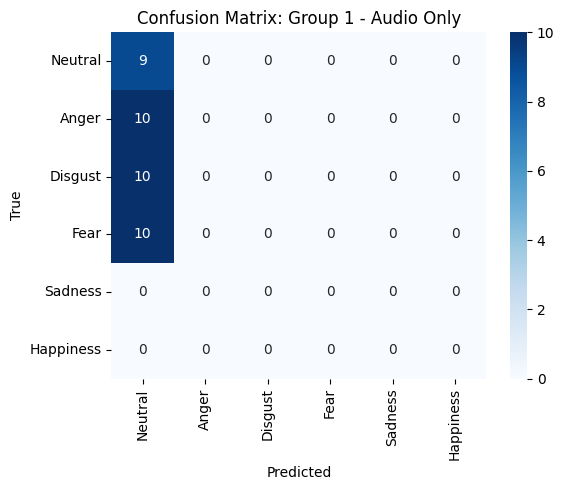


 Evaluation for Group 2 - Audio Only
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

     Neutral       1.00      1.00      1.00        60
       Anger       0.00      0.00      0.00         0
     Disgust       0.00      0.00      0.00         0
        Fear       0.00      0.00      0.00         0
     Sadness       0.00      0.00      0.00         0
   Happiness       0.00      0.00      0.00         0

    accuracy                           1.00        60
   macro avg       0.17      0.17      0.17        60
weighted avg       1.00      1.00      1.00        60



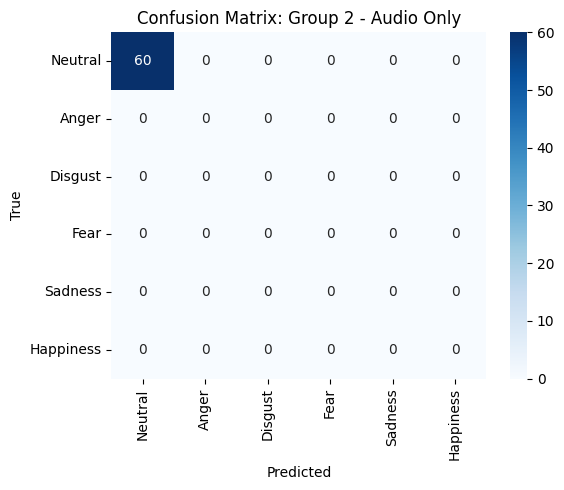


 Evaluation for Group 3 - Audio Only
Accuracy: 0.1667

Classification Report:
              precision    recall  f1-score   support

     Neutral       0.17      1.00      0.29        10
       Anger       0.00      0.00      0.00        10
     Disgust       0.00      0.00      0.00        10
        Fear       0.00      0.00      0.00        10
     Sadness       0.00      0.00      0.00         0
   Happiness       0.00      0.00      0.00         0

   micro avg       0.17      0.25      0.20        40
   macro avg       0.03      0.17      0.05        40
weighted avg       0.04      0.25      0.07        40



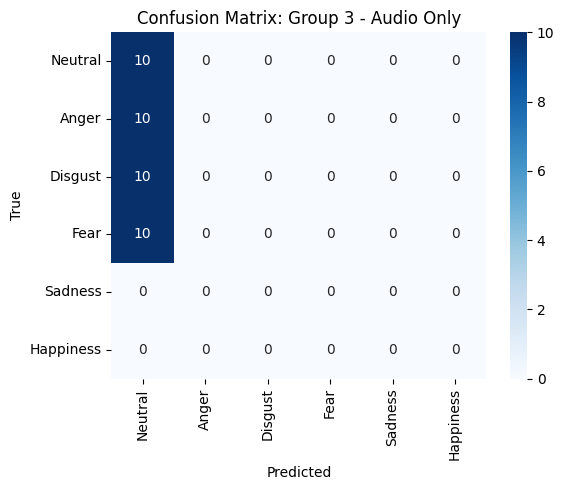

In [31]:
def evaluate_group(df, group_name, label_list=None):
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt

    print(f"\n Evaluation for {group_name}")
    y_true = df["tone"]
    y_pred = df["predicted_emotion"]

    acc = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {acc:.4f}")

    # Warn if any emotion labels are missing
    present_classes = set(y_true) | set(y_pred)
    missing = set(label_list) - present_classes
    if missing:
        print(f"Warning: These classes are missing in this group: {missing}")

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, labels=label_list, target_names=label_list, zero_division=0))

    cm = confusion_matrix(y_true, y_pred, labels=label_list)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_list, yticklabels=label_list, cmap='Blues')
    plt.title(f"Confusion Matrix: {group_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show(block=False)

emo_labels = ["Neutral", "Anger", "Disgust", "Fear", "Sadness", "Happiness"]

evaluate_group(group1_pred, "Group 1 - Audio Only", label_list=emo_labels)
evaluate_group(group2_pred, "Group 2 - Audio Only", label_list=emo_labels)
evaluate_group(group3_pred, "Group 3 - Audio Only", label_list=emo_labels)

### Audio + text

In [32]:
import torch.nn.functional as F

In [33]:
# Audio + Text
group1_pred_text = run_group(model_text_audio, group1_df, name="Group 1 - Audio + Text")
group2_pred_text = run_group(model_text_audio, group2_df, name="Group 2 - Audio + Text")
group3_pred_text = run_group(model_text_audio, group3_df, name="Group 3 - Audio + Text")


 Running: Group 1 - Audio + Text


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(
Due to a bug fix in https://github.com/huggingface/transformers/pull/28687 transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English.This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`.



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5567
Anger: 0.0696
Disgust: 0.0817
Fear: 0.0814
Sadness: 0.0685
Happiness: 0.1420


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5579
Anger: 0.0792
Disgust: 0.0757
Fear: 0.0751
Sadness: 0.0632
Happiness: 0.1489


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5977
Anger: 0.0511
Disgust: 0.1097
Fear: 0.0728
Sadness: 0.0806
Happiness: 0.0882


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.4142
Anger: 0.0599
Disgust: 0.1064
Fear: 0.0805
Sadness: 0.2442
Happiness: 0.0948


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Happiness

Emotion Probabilities:
Neutral: 0.1181
Anger: 0.0830
Disgust: 0.0742
Fear: 0.0759
Sadness: 0.0670
Happiness: 0.5818


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5047
Anger: 0.0817
Disgust: 0.0723
Fear: 0.0772
Sadness: 0.0618
Happiness: 0.2024


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5446
Anger: 0.1221
Disgust: 0.0537
Fear: 0.0910
Sadness: 0.0608
Happiness: 0.1279


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5128
Anger: 0.1609
Disgust: 0.0702
Fear: 0.0975
Sadness: 0.0761
Happiness: 0.0826


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Fear

Emotion Probabilities:
Neutral: 0.2388
Anger: 0.2541
Disgust: 0.0794
Fear: 0.2671
Sadness: 0.0703
Happiness: 0.0902


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5465
Anger: 0.1353
Disgust: 0.0597
Fear: 0.0830
Sadness: 0.0775
Happiness: 0.0980


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5458
Anger: 0.1117
Disgust: 0.0588
Fear: 0.0973
Sadness: 0.0626
Happiness: 0.1239


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5564
Anger: 0.1605
Disgust: 0.0528
Fear: 0.0793
Sadness: 0.0681
Happiness: 0.0830


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5593
Anger: 0.0861
Disgust: 0.0757
Fear: 0.0817
Sadness: 0.0695
Happiness: 0.1276


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Happiness

Emotion Probabilities:
Neutral: 0.0972
Anger: 0.0799
Disgust: 0.0788
Fear: 0.0811
Sadness: 0.0667
Happiness: 0.5963


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.4114
Anger: 0.0671
Disgust: 0.1099
Fear: 0.2054
Sadness: 0.1084
Happiness: 0.0978


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5531
Anger: 0.0792
Disgust: 0.0817
Fear: 0.0894
Sadness: 0.0713
Happiness: 0.1252


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.3454
Anger: 0.0953
Disgust: 0.1097
Fear: 0.1865
Sadness: 0.1320
Happiness: 0.1311


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5221
Anger: 0.1636
Disgust: 0.0457
Fear: 0.0979
Sadness: 0.0675
Happiness: 0.1032


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5599
Anger: 0.1360
Disgust: 0.0587
Fear: 0.0821
Sadness: 0.0637
Happiness: 0.0995


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5723
Anger: 0.1287
Disgust: 0.0650
Fear: 0.0801
Sadness: 0.0740
Happiness: 0.0798


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.4812
Anger: 0.1228
Disgust: 0.0930
Fear: 0.0817
Sadness: 0.1169
Happiness: 0.1043


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5720
Anger: 0.1332
Disgust: 0.0646
Fear: 0.0778
Sadness: 0.0717
Happiness: 0.0806


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Anger

Emotion Probabilities:
Neutral: 0.1410
Anger: 0.3525
Disgust: 0.1967
Fear: 0.0840
Sadness: 0.1243
Happiness: 0.1015


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Disgust

Emotion Probabilities:
Neutral: 0.1071
Anger: 0.1484
Disgust: 0.3584
Fear: 0.0801
Sadness: 0.2237
Happiness: 0.0822


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5446
Anger: 0.1443
Disgust: 0.0462
Fear: 0.0790
Sadness: 0.0588
Happiness: 0.1270


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Anger

Emotion Probabilities:
Neutral: 0.0727
Anger: 0.6358
Disgust: 0.0507
Fear: 0.0846
Sadness: 0.0631
Happiness: 0.0932


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5456
Anger: 0.1540
Disgust: 0.0457
Fear: 0.0819
Sadness: 0.0593
Happiness: 0.1135


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.3466
Anger: 0.1562
Disgust: 0.0482
Fear: 0.2599
Sadness: 0.0590
Happiness: 0.1301


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5365
Anger: 0.1489
Disgust: 0.0403
Fear: 0.0750
Sadness: 0.0555
Happiness: 0.1438


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5400
Anger: 0.1716
Disgust: 0.0405
Fear: 0.0796
Sadness: 0.0591
Happiness: 0.1091


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5281
Anger: 0.1293
Disgust: 0.0789
Fear: 0.0806
Sadness: 0.0680
Happiness: 0.1152


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5767
Anger: 0.0998
Disgust: 0.0811
Fear: 0.0728
Sadness: 0.0673
Happiness: 0.1024


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Disgust

Emotion Probabilities:
Neutral: 0.2102
Anger: 0.1106
Disgust: 0.4141
Fear: 0.0763
Sadness: 0.0775
Happiness: 0.1113


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Fear

Emotion Probabilities:
Neutral: 0.2380
Anger: 0.1197
Disgust: 0.1485
Fear: 0.2598
Sadness: 0.0764
Happiness: 0.1577


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5343
Anger: 0.1102
Disgust: 0.0803
Fear: 0.0847
Sadness: 0.0868
Happiness: 0.1037


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.2242
Anger: 0.1869
Disgust: 0.0867
Fear: 0.1727
Sadness: 0.1109
Happiness: 0.2187


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5540
Anger: 0.1317
Disgust: 0.0529
Fear: 0.0863
Sadness: 0.0636
Happiness: 0.1116


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5475
Anger: 0.1083
Disgust: 0.0685
Fear: 0.0839
Sadness: 0.0702
Happiness: 0.1216


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Happiness

Emotion Probabilities:
Neutral: 0.1348
Anger: 0.1344
Disgust: 0.0647
Fear: 0.0774
Sadness: 0.0708
Happiness: 0.5178


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5367
Anger: 0.0986
Disgust: 0.0833
Fear: 0.0786
Sadness: 0.0763
Happiness: 0.1266


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5630
Anger: 0.1224
Disgust: 0.0677
Fear: 0.0823
Sadness: 0.0669
Happiness: 0.0978


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Happiness

Emotion Probabilities:
Neutral: 0.1011
Anger: 0.1421
Disgust: 0.0541
Fear: 0.0820
Sadness: 0.0638
Happiness: 0.5569


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.4891
Anger: 0.1133
Disgust: 0.0748
Fear: 0.1629
Sadness: 0.0825
Happiness: 0.0775


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.4507
Anger: 0.1629
Disgust: 0.0397
Fear: 0.1782
Sadness: 0.0505
Happiness: 0.1179


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.4832
Anger: 0.1285
Disgust: 0.0632
Fear: 0.1624
Sadness: 0.0718
Happiness: 0.0908


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.4831
Anger: 0.1194
Disgust: 0.0684
Fear: 0.1650
Sadness: 0.0812
Happiness: 0.0830


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.4788
Anger: 0.1257
Disgust: 0.0628
Fear: 0.1653
Sadness: 0.0753
Happiness: 0.0922


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.4462
Anger: 0.1687
Disgust: 0.0357
Fear: 0.1783
Sadness: 0.0473
Happiness: 0.1238


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Fear

Emotion Probabilities:
Neutral: 0.0684
Anger: 0.1391
Disgust: 0.0414
Fear: 0.5513
Sadness: 0.0480
Happiness: 0.1519


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Fear

Emotion Probabilities:
Neutral: 0.0592
Anger: 0.1658
Disgust: 0.0455
Fear: 0.5556
Sadness: 0.0485
Happiness: 0.1254


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Fear

Emotion Probabilities:
Neutral: 0.0783
Anger: 0.0894
Disgust: 0.0611
Fear: 0.5462
Sadness: 0.0525
Happiness: 0.1724


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Fear

Emotion Probabilities:
Neutral: 0.1108
Anger: 0.1115
Disgust: 0.0466
Fear: 0.5165
Sadness: 0.0482
Happiness: 0.1665


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Fear

Emotion Probabilities:
Neutral: 0.0704
Anger: 0.1142
Disgust: 0.0452
Fear: 0.5502
Sadness: 0.0480
Happiness: 0.1721


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Fear

Emotion Probabilities:
Neutral: 0.0486
Anger: 0.1457
Disgust: 0.0437
Fear: 0.5662
Sadness: 0.0494
Happiness: 0.1466


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Happiness

Emotion Probabilities:
Neutral: 0.1864
Anger: 0.1468
Disgust: 0.0506
Fear: 0.0809
Sadness: 0.0624
Happiness: 0.4730


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5108
Anger: 0.1581
Disgust: 0.0580
Fear: 0.0788
Sadness: 0.0941
Happiness: 0.1002


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.3387
Anger: 0.1847
Disgust: 0.1087
Fear: 0.0851
Sadness: 0.1752
Happiness: 0.1076


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5344
Anger: 0.1361
Disgust: 0.0429
Fear: 0.0805
Sadness: 0.0597
Happiness: 0.1464


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5354
Anger: 0.1482
Disgust: 0.0459
Fear: 0.0807
Sadness: 0.0691
Happiness: 0.1207

 Running: Group 2 - Audio + Text


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5710
Anger: 0.0612
Disgust: 0.1000
Fear: 0.0767
Sadness: 0.0759
Happiness: 0.1153


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Happiness

Emotion Probabilities:
Neutral: 0.2411
Anger: 0.0673
Disgust: 0.0898
Fear: 0.0792
Sadness: 0.0715
Happiness: 0.4511


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5417
Anger: 0.0594
Disgust: 0.1001
Fear: 0.0808
Sadness: 0.0741
Happiness: 0.1438


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5464
Anger: 0.0688
Disgust: 0.0866
Fear: 0.0811
Sadness: 0.0714
Happiness: 0.1458


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Happiness

Emotion Probabilities:
Neutral: 0.0835
Anger: 0.0665
Disgust: 0.0842
Fear: 0.0805
Sadness: 0.0666
Happiness: 0.6188


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5639
Anger: 0.0731
Disgust: 0.0803
Fear: 0.0797
Sadness: 0.0634
Happiness: 0.1397


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Sadness

Emotion Probabilities:
Neutral: 0.0739
Anger: 0.1068
Disgust: 0.0645
Fear: 0.0935
Sadness: 0.5324
Happiness: 0.1288


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.3249
Anger: 0.1248
Disgust: 0.1618
Fear: 0.1338
Sadness: 0.1203
Happiness: 0.1344


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Anger

Emotion Probabilities:
Neutral: 0.1025
Anger: 0.3339
Disgust: 0.0617
Fear: 0.2163
Sadness: 0.1213
Happiness: 0.1642


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Happiness

Emotion Probabilities:
Neutral: 0.0874
Anger: 0.1204
Disgust: 0.0772
Fear: 0.0944
Sadness: 0.0631
Happiness: 0.5576


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5553
Anger: 0.0997
Disgust: 0.0776
Fear: 0.0890
Sadness: 0.0644
Happiness: 0.1139


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.3264
Anger: 0.1251
Disgust: 0.1589
Fear: 0.1962
Sadness: 0.0851
Happiness: 0.1084


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5473
Anger: 0.0805
Disgust: 0.0919
Fear: 0.0786
Sadness: 0.0989
Happiness: 0.1028


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5357
Anger: 0.0971
Disgust: 0.0943
Fear: 0.0822
Sadness: 0.0844
Happiness: 0.1063


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5398
Anger: 0.1020
Disgust: 0.0860
Fear: 0.0912
Sadness: 0.0808
Happiness: 0.1002


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Sadness

Emotion Probabilities:
Neutral: 0.0997
Anger: 0.1339
Disgust: 0.0910
Fear: 0.1250
Sadness: 0.3352
Happiness: 0.2152


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5493
Anger: 0.1179
Disgust: 0.0740
Fear: 0.0805
Sadness: 0.0688
Happiness: 0.1096


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5476
Anger: 0.1138
Disgust: 0.0772
Fear: 0.0788
Sadness: 0.0667
Happiness: 0.1158


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.2827
Anger: 0.1158
Disgust: 0.1840
Fear: 0.0793
Sadness: 0.0677
Happiness: 0.2704


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5784
Anger: 0.1186
Disgust: 0.0732
Fear: 0.0748
Sadness: 0.0710
Happiness: 0.0840


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Happiness

Emotion Probabilities:
Neutral: 0.1996
Anger: 0.1342
Disgust: 0.0733
Fear: 0.1037
Sadness: 0.1415
Happiness: 0.3477


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5377
Anger: 0.1270
Disgust: 0.0786
Fear: 0.0778
Sadness: 0.0910
Happiness: 0.0879


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Sadness

Emotion Probabilities:
Neutral: 0.0921
Anger: 0.1134
Disgust: 0.0787
Fear: 0.0737
Sadness: 0.5617
Happiness: 0.0805


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5559
Anger: 0.1223
Disgust: 0.0720
Fear: 0.0754
Sadness: 0.0683
Happiness: 0.1062


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Happiness

Emotion Probabilities:
Neutral: 0.1869
Anger: 0.1765
Disgust: 0.0564
Fear: 0.0810
Sadness: 0.0611
Happiness: 0.4381


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Sadness

Emotion Probabilities:
Neutral: 0.2367
Anger: 0.1645
Disgust: 0.0516
Fear: 0.0983
Sadness: 0.3309
Happiness: 0.1180


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5414
Anger: 0.1424
Disgust: 0.0482
Fear: 0.0769
Sadness: 0.0587
Happiness: 0.1324


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5111
Anger: 0.1501
Disgust: 0.0472
Fear: 0.0785
Sadness: 0.0640
Happiness: 0.1492


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5418
Anger: 0.1178
Disgust: 0.0552
Fear: 0.0734
Sadness: 0.0608
Happiness: 0.1509


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.4849
Anger: 0.1668
Disgust: 0.0445
Fear: 0.0807
Sadness: 0.0607
Happiness: 0.1624


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.4696
Anger: 0.0921
Disgust: 0.0806
Fear: 0.0728
Sadness: 0.0764
Happiness: 0.2084


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5707
Anger: 0.0902
Disgust: 0.0801
Fear: 0.0772
Sadness: 0.0692
Happiness: 0.1127


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5516
Anger: 0.1150
Disgust: 0.0790
Fear: 0.0791
Sadness: 0.0668
Happiness: 0.1085


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.4062
Anger: 0.1056
Disgust: 0.0900
Fear: 0.0836
Sadness: 0.2026
Happiness: 0.1120


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5567
Anger: 0.0987
Disgust: 0.0770
Fear: 0.0821
Sadness: 0.0682
Happiness: 0.1172


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Disgust

Emotion Probabilities:
Neutral: 0.1675
Anger: 0.0934
Disgust: 0.4486
Fear: 0.1048
Sadness: 0.0789
Happiness: 0.1068


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Happiness

Emotion Probabilities:
Neutral: 0.1432
Anger: 0.1260
Disgust: 0.0682
Fear: 0.0789
Sadness: 0.0685
Happiness: 0.5152


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.3191
Anger: 0.1563
Disgust: 0.2253
Fear: 0.0967
Sadness: 0.1059
Happiness: 0.0967


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5742
Anger: 0.1120
Disgust: 0.0775
Fear: 0.0813
Sadness: 0.0699
Happiness: 0.0849


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5519
Anger: 0.1372
Disgust: 0.0654
Fear: 0.0863
Sadness: 0.0701
Happiness: 0.0892


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.4473
Anger: 0.1628
Disgust: 0.0925
Fear: 0.0833
Sadness: 0.1101
Happiness: 0.1040


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.3437
Anger: 0.1320
Disgust: 0.0756
Fear: 0.0812
Sadness: 0.2783
Happiness: 0.0893


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Fear

Emotion Probabilities:
Neutral: 0.1656
Anger: 0.1830
Disgust: 0.1163
Fear: 0.3389
Sadness: 0.1004
Happiness: 0.0958


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.2953
Anger: 0.2513
Disgust: 0.0990
Fear: 0.1836
Sadness: 0.0659
Happiness: 0.1047


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Fear

Emotion Probabilities:
Neutral: 0.0638
Anger: 0.1594
Disgust: 0.0554
Fear: 0.5541
Sadness: 0.0581
Happiness: 0.1091


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5515
Anger: 0.1453
Disgust: 0.0530
Fear: 0.0816
Sadness: 0.0670
Happiness: 0.1016


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.4746
Anger: 0.1649
Disgust: 0.0717
Fear: 0.0933
Sadness: 0.0900
Happiness: 0.1055


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.4609
Anger: 0.1525
Disgust: 0.0486
Fear: 0.1089
Sadness: 0.0601
Happiness: 0.1690


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Fear

Emotion Probabilities:
Neutral: 0.1928
Anger: 0.1316
Disgust: 0.0477
Fear: 0.4340
Sadness: 0.0519
Happiness: 0.1419


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Fear

Emotion Probabilities:
Neutral: 0.0804
Anger: 0.1490
Disgust: 0.0467
Fear: 0.5197
Sadness: 0.0494
Happiness: 0.1548


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Fear

Emotion Probabilities:
Neutral: 0.0600
Anger: 0.3233
Disgust: 0.0599
Fear: 0.3347
Sadness: 0.0644
Happiness: 0.1578


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Fear

Emotion Probabilities:
Neutral: 0.1683
Anger: 0.1157
Disgust: 0.0536
Fear: 0.4318
Sadness: 0.0602
Happiness: 0.1705


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Fear

Emotion Probabilities:
Neutral: 0.0713
Anger: 0.1582
Disgust: 0.1413
Fear: 0.2910
Sadness: 0.1771
Happiness: 0.1611


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Fear

Emotion Probabilities:
Neutral: 0.0887
Anger: 0.1030
Disgust: 0.0524
Fear: 0.5451
Sadness: 0.0513
Happiness: 0.1596


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5268
Anger: 0.1585
Disgust: 0.0527
Fear: 0.0795
Sadness: 0.0644
Happiness: 0.1181


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Sadness

Emotion Probabilities:
Neutral: 0.1773
Anger: 0.1534
Disgust: 0.0565
Fear: 0.0807
Sadness: 0.4242
Happiness: 0.1079


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.4808
Anger: 0.1593
Disgust: 0.0631
Fear: 0.0815
Sadness: 0.1017
Happiness: 0.1137


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.4907
Anger: 0.1590
Disgust: 0.0713
Fear: 0.0798
Sadness: 0.0710
Happiness: 0.1282


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Happiness

Emotion Probabilities:
Neutral: 0.0660
Anger: 0.1436
Disgust: 0.0533
Fear: 0.0833
Sadness: 0.0664
Happiness: 0.5874


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.4443
Anger: 0.1372
Disgust: 0.0796
Fear: 0.0796
Sadness: 0.1488
Happiness: 0.1105

 Running: Group 3 - Audio + Text


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.4856
Anger: 0.0770
Disgust: 0.0858
Fear: 0.0789
Sadness: 0.0652
Happiness: 0.2076


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Happiness

Emotion Probabilities:
Neutral: 0.0748
Anger: 0.0787
Disgust: 0.0789
Fear: 0.0758
Sadness: 0.0607
Happiness: 0.6312


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5545
Anger: 0.0768
Disgust: 0.0758
Fear: 0.0789
Sadness: 0.0650
Happiness: 0.1491


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5539
Anger: 0.0836
Disgust: 0.0766
Fear: 0.0829
Sadness: 0.0707
Happiness: 0.1323


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Happiness

Emotion Probabilities:
Neutral: 0.0778
Anger: 0.0664
Disgust: 0.0825
Fear: 0.0798
Sadness: 0.0674
Happiness: 0.6261


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5649
Anger: 0.0735
Disgust: 0.0826
Fear: 0.0767
Sadness: 0.0623
Happiness: 0.1400


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5508
Anger: 0.1248
Disgust: 0.0634
Fear: 0.0950
Sadness: 0.0645
Happiness: 0.1014


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Disgust

Emotion Probabilities:
Neutral: 0.1596
Anger: 0.1296
Disgust: 0.4570
Fear: 0.0929
Sadness: 0.0750
Happiness: 0.0859


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5617
Anger: 0.1226
Disgust: 0.0651
Fear: 0.0845
Sadness: 0.0645
Happiness: 0.1016


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5555
Anger: 0.1327
Disgust: 0.0512
Fear: 0.0805
Sadness: 0.0593
Happiness: 0.1208


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Anger

Emotion Probabilities:
Neutral: 0.1854
Anger: 0.3451
Disgust: 0.1684
Fear: 0.0877
Sadness: 0.1098
Happiness: 0.1037


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5359
Anger: 0.1430
Disgust: 0.0599
Fear: 0.0880
Sadness: 0.0772
Happiness: 0.0962


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Disgust

Emotion Probabilities:
Neutral: 0.1409
Anger: 0.1883
Disgust: 0.4278
Fear: 0.0839
Sadness: 0.0760
Happiness: 0.0831


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5311
Anger: 0.1444
Disgust: 0.0947
Fear: 0.0760
Sadness: 0.0739
Happiness: 0.0799


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Happiness

Emotion Probabilities:
Neutral: 0.1054
Anger: 0.1322
Disgust: 0.0704
Fear: 0.2982
Sadness: 0.0687
Happiness: 0.3251


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.4990
Anger: 0.1319
Disgust: 0.0671
Fear: 0.1272
Sadness: 0.0660
Happiness: 0.1088


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.4578
Anger: 0.1561
Disgust: 0.1154
Fear: 0.1054
Sadness: 0.0651
Happiness: 0.1002


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5523
Anger: 0.1369
Disgust: 0.0728
Fear: 0.0815
Sadness: 0.0646
Happiness: 0.0919


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5551
Anger: 0.1201
Disgust: 0.0722
Fear: 0.0749
Sadness: 0.0699
Happiness: 0.1077


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5618
Anger: 0.1205
Disgust: 0.0721
Fear: 0.0879
Sadness: 0.0704
Happiness: 0.0873


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Fear

Emotion Probabilities:
Neutral: 0.2459
Anger: 0.1365
Disgust: 0.0637
Fear: 0.3768
Sadness: 0.0820
Happiness: 0.0952


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Anger

Emotion Probabilities:
Neutral: 0.2672
Anger: 0.2918
Disgust: 0.1703
Fear: 0.0756
Sadness: 0.0743
Happiness: 0.1209


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Happiness

Emotion Probabilities:
Neutral: 0.0989
Anger: 0.1032
Disgust: 0.0788
Fear: 0.0776
Sadness: 0.0710
Happiness: 0.5705


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5718
Anger: 0.0921
Disgust: 0.0812
Fear: 0.0773
Sadness: 0.0733
Happiness: 0.1042


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5174
Anger: 0.1468
Disgust: 0.0472
Fear: 0.0795
Sadness: 0.0791
Happiness: 0.1299


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.4762
Anger: 0.1684
Disgust: 0.0760
Fear: 0.0778
Sadness: 0.0965
Happiness: 0.1052


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5492
Anger: 0.1261
Disgust: 0.0573
Fear: 0.0760
Sadness: 0.0613
Happiness: 0.1300


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5426
Anger: 0.1561
Disgust: 0.0532
Fear: 0.0755
Sadness: 0.0702
Happiness: 0.1024


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Happiness

Emotion Probabilities:
Neutral: 0.0948
Anger: 0.1204
Disgust: 0.0542
Fear: 0.0738
Sadness: 0.0634
Happiness: 0.5935


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Happiness

Emotion Probabilities:
Neutral: 0.2746
Anger: 0.1552
Disgust: 0.0480
Fear: 0.0758
Sadness: 0.0634
Happiness: 0.3830


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Sadness

Emotion Probabilities:
Neutral: 0.0990
Anger: 0.0958
Disgust: 0.0772
Fear: 0.0788
Sadness: 0.5368
Happiness: 0.1124


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.2854
Anger: 0.1043
Disgust: 0.0773
Fear: 0.0753
Sadness: 0.2068
Happiness: 0.2508


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Sadness

Emotion Probabilities:
Neutral: 0.0915
Anger: 0.0855
Disgust: 0.0849
Fear: 0.0769
Sadness: 0.5592
Happiness: 0.1020


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Sadness

Emotion Probabilities:
Neutral: 0.1088
Anger: 0.2307
Disgust: 0.0892
Fear: 0.0990
Sadness: 0.3541
Happiness: 0.1183


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5655
Anger: 0.1024
Disgust: 0.0729
Fear: 0.0814
Sadness: 0.0656
Happiness: 0.1123


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Sadness

Emotion Probabilities:
Neutral: 0.1000
Anger: 0.0825
Disgust: 0.0853
Fear: 0.0804
Sadness: 0.5477
Happiness: 0.1040


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5554
Anger: 0.1310
Disgust: 0.0718
Fear: 0.0735
Sadness: 0.0705
Happiness: 0.0977


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.2912
Anger: 0.1886
Disgust: 0.0913
Fear: 0.0962
Sadness: 0.2585
Happiness: 0.0741


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5797
Anger: 0.1283
Disgust: 0.0763
Fear: 0.0722
Sadness: 0.0717
Happiness: 0.0717


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Fear

Emotion Probabilities:
Neutral: 0.1447
Anger: 0.1593
Disgust: 0.0823
Fear: 0.4647
Sadness: 0.0674
Happiness: 0.0815


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.3377
Anger: 0.1515
Disgust: 0.0746
Fear: 0.0877
Sadness: 0.2700
Happiness: 0.0786


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5693
Anger: 0.1339
Disgust: 0.0709
Fear: 0.0765
Sadness: 0.0734
Happiness: 0.0760


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Fear

Emotion Probabilities:
Neutral: 0.1507
Anger: 0.2063
Disgust: 0.1029
Fear: 0.3434
Sadness: 0.0913
Happiness: 0.1054


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.2902
Anger: 0.2611
Disgust: 0.0944
Fear: 0.1869
Sadness: 0.0604
Happiness: 0.1069


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Fear

Emotion Probabilities:
Neutral: 0.0592
Anger: 0.1680
Disgust: 0.0476
Fear: 0.5594
Sadness: 0.0521
Happiness: 0.1137


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5691
Anger: 0.1247
Disgust: 0.0665
Fear: 0.0737
Sadness: 0.0816
Happiness: 0.0843


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.4980
Anger: 0.1414
Disgust: 0.0608
Fear: 0.1225
Sadness: 0.0763
Happiness: 0.1009


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.4404
Anger: 0.1865
Disgust: 0.0297
Fear: 0.1110
Sadness: 0.0451
Happiness: 0.1873


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Fear

Emotion Probabilities:
Neutral: 0.0608
Anger: 0.1701
Disgust: 0.0858
Fear: 0.4833
Sadness: 0.0494
Happiness: 0.1507


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Anger

Emotion Probabilities:
Neutral: 0.0767
Anger: 0.2922
Disgust: 0.2497
Fear: 0.2147
Sadness: 0.0534
Happiness: 0.1133


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Anger

Emotion Probabilities:
Neutral: 0.0692
Anger: 0.3558
Disgust: 0.0604
Fear: 0.3342
Sadness: 0.0650
Happiness: 0.1153


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Fear

Emotion Probabilities:
Neutral: 0.1661
Anger: 0.1644
Disgust: 0.0420
Fear: 0.4354
Sadness: 0.0586
Happiness: 0.1336


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Fear

Emotion Probabilities:
Neutral: 0.0670
Anger: 0.2042
Disgust: 0.1289
Fear: 0.2941
Sadness: 0.1740
Happiness: 0.1317


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Fear

Emotion Probabilities:
Neutral: 0.0665
Anger: 0.1410
Disgust: 0.0454
Fear: 0.5692
Sadness: 0.0489
Happiness: 0.1290


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.4106
Anger: 0.1443
Disgust: 0.1184
Fear: 0.0820
Sadness: 0.1215
Happiness: 0.1232


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5569
Anger: 0.1513
Disgust: 0.0569
Fear: 0.0764
Sadness: 0.0666
Happiness: 0.0918


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Happiness

Emotion Probabilities:
Neutral: 0.0972
Anger: 0.1269
Disgust: 0.0571
Fear: 0.0807
Sadness: 0.0670
Happiness: 0.5712


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Neutral

Emotion Probabilities:
Neutral: 0.5261
Anger: 0.1264
Disgust: 0.0707
Fear: 0.0819
Sadness: 0.0708
Happiness: 0.1241


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Disgust

Emotion Probabilities:
Neutral: 0.0711
Anger: 0.3004
Disgust: 0.3640
Fear: 0.0826
Sadness: 0.0682
Happiness: 0.1138


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(



Predicted Emotion: Anger

Emotion Probabilities:
Neutral: 0.2127
Anger: 0.3328
Disgust: 0.1764
Fear: 0.0811
Sadness: 0.1045
Happiness: 0.0924



 Evaluation for Group 1 - Audio + Text
 Accuracy: 0.1695

 Classification Report:
              precision    recall  f1-score   support

       Anger       0.33      0.10      0.15        10
     Disgust       0.00      0.00      0.00        10
        Fear       0.17      0.10      0.12        10
   Happiness       0.00      0.00      0.00         0
       Happy       0.00      0.00      0.00        10
     Neutral       0.18      0.89      0.30         9
         Sad       0.00      0.00      0.00        10

    accuracy                           0.17        59
   macro avg       0.10      0.16      0.08        59
weighted avg       0.11      0.17      0.09        59



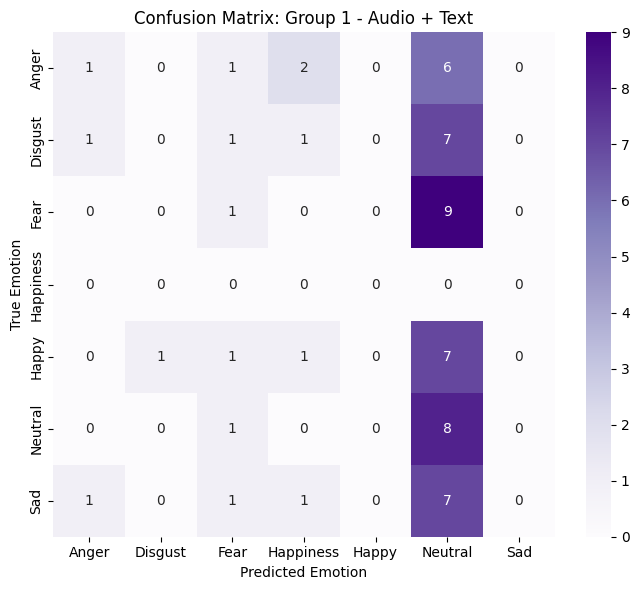


 Evaluation for Group 2 - Audio + Text
 Accuracy: 0.6333

 Classification Report:
              precision    recall  f1-score   support

       Anger       0.00      0.00      0.00         0
     Disgust       0.00      0.00      0.00         0
        Fear       0.00      0.00      0.00         0
   Happiness       0.00      0.00      0.00         0
     Neutral       1.00      0.63      0.78        60
     Sadness       0.00      0.00      0.00         0

    accuracy                           0.63        60
   macro avg       0.17      0.11      0.13        60
weighted avg       1.00      0.63      0.78        60



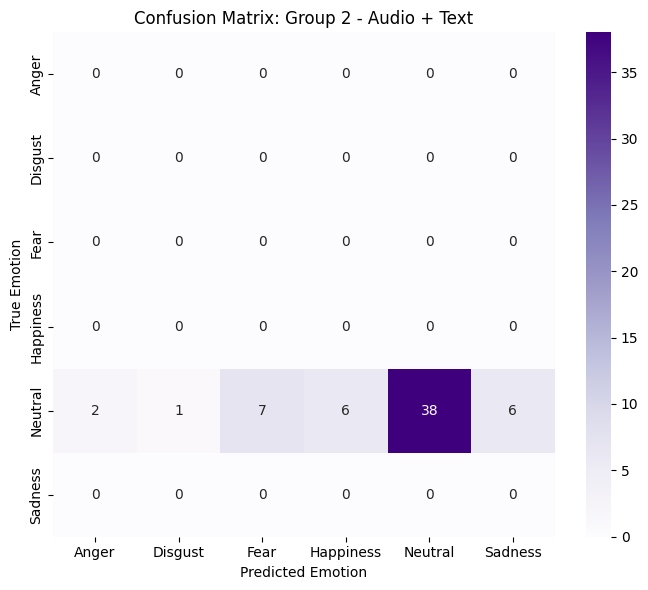


 Evaluation for Group 3 - Audio + Text
 Accuracy: 0.1667

 Classification Report:
              precision    recall  f1-score   support

       Anger       0.29      0.20      0.24        10
     Disgust       0.00      0.00      0.00        10
        Fear       0.29      0.20      0.24        10
   Happiness       0.00      0.00      0.00         0
       Happy       0.00      0.00      0.00        10
     Neutral       0.18      0.60      0.28        10
         Sad       0.00      0.00      0.00        10
     Sadness       0.00      0.00      0.00         0

    accuracy                           0.17        60
   macro avg       0.09      0.12      0.09        60
weighted avg       0.13      0.17      0.12        60



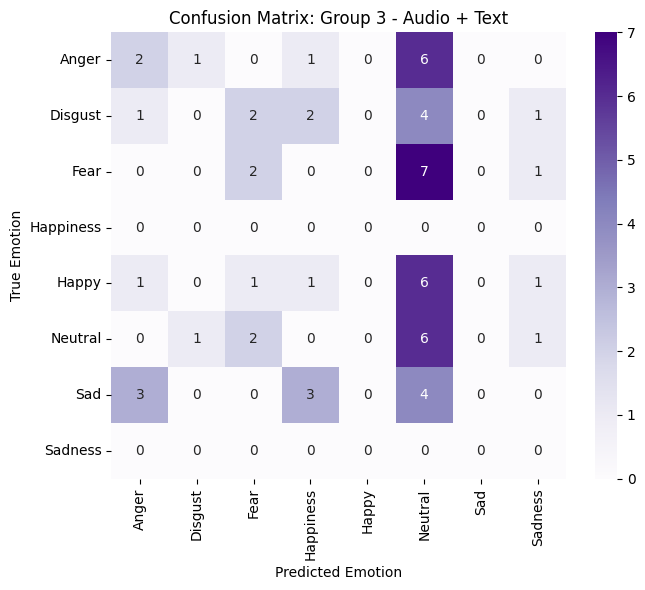

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_text_group(df, group_name, modality):
    print(f"\n Evaluation for {group_name} - {modality}")

    # Get true and predicted labels
    y_true = df["tone"]
    y_pred = df["predicted_emotion"]

    # Get sorted unique labels
    unique_labels = sorted(list(set(y_true) | set(y_pred)))

    # Accuracy
    acc = accuracy_score(y_true, y_pred)
    print(f" Accuracy: {acc:.4f}")

    # Classification report
    print("\n Classification Report:")
    print(classification_report(y_true, y_pred, target_names=unique_labels, zero_division=0))

    # Confusion matrix heatmap
    cm = confusion_matrix(y_true, y_pred, labels=unique_labels)
    plt.figure(figsize=(7, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Purples",
                xticklabels=unique_labels, yticklabels=unique_labels)
    plt.title(f"Confusion Matrix: {group_name} - {modality}")
    plt.xlabel("Predicted Emotion")
    plt.ylabel("True Emotion")
    plt.tight_layout()
    plt.show()

# Run evaluations
# Run evaluations
evaluate_text_group(group1_pred_text, "Group 1", "Audio + Text")
evaluate_text_group(group2_pred_text, "Group 2", "Audio + Text")
evaluate_text_group(group3_pred_text, "Group 3", "Audio + Text")